In [64]:
import numpy as np
import sympy as s
import QMbasics as QM
import matplotlib.pyplot as plt

In [41]:
class PoeschlTellerState(QM.QMstate):
    def __init__(self,n,m):
        x = s.symbols("x")
        psi = s.assoc_legendre(n,m,s.tanh(x))
        self.n = n
        self.m = m
        
        #normierung
        C = s.integrate(s.assoc_legendre(n,m,x)**2/(1-x**2),(x,-1,1))
        
        
        super().__init__(psi/s.sqrt(C),do_simplify=True)
    def get_energy(self):
        return -self.m**2/2

In [51]:
def potential(x,n):
    return -n*(n+1)/2./np.cosh(x)**2

In [61]:
def plot_system(n,a):
    x = np.linspace(-a,a,200)
    plt.plot(x,potential(x,n))
    plt.twinx()
    for i in range(1,n+1):
        state = PoeschlTellerState(n,i)
        plt.plot(x,state.p_(x)-i**2/2,color='green')
        plt.plot(x,np.ones_like(x)*(-i**2/2),"--",color='grey')
    

In [65]:
def force(x,n):
    return -n*(n+1.)*np.tanh(x)/np.cosh(x)**2

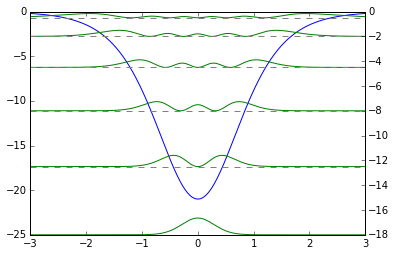

In [67]:
#plot_system(6,3)